In [1]:
! pip install retina-face


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.6 MB/s eta 0:00:0000:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


## Loading Images

In [3]:
import os
from glob import glob
from PIL import Image
from retinaface import RetinaFace
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
test_folder = "/kaggle/input/wider-face-a-face-detection-dataset/WIDER_val/WIDER_val/images/19--Couple"  
image_paths = glob(os.path.join(test_folder, "*.jpg"))

## Detecting Faces

In [4]:


results = []

for image_path in image_paths:
    faces = RetinaFace.detect_faces(image_path)
    results.append({
                'image': os.path.basename(image_path),
                'detections':faces,

            })


24-08-18 12:04:38 - Directory /root/.deepface created
24-08-18 12:04:38 - Directory /root/.deepface/weights created
24-08-18 12:04:38 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:00<00:00, 131MB/s]  


## Calculating accuracy

In [5]:
total_pred_faes=0
for result in results:
    total_pred_faes+=len(result['detections'].keys())
print(total_pred_faes)

91


In [7]:
annotation_file="/kaggle/input/wider-face-a-face-detection-dataset/wider_face_annotations/wider_face_split/wider_face_val_bbx_gt.txt"
folder_to_check = "19--Couple"
total_faces=0

with open(annotation_file, "r") as file:
    lines = file.readlines()  # Read all lines into a list

for i in range(len(lines) - 1):
    if folder_to_check in lines[i]:
        total_faces+=int(lines[i+1])
        
    else:
        continue
print(total_faces)

97


In [8]:
error = abs(total_faces - total_pred_faes)


accuracy = (1 - (error / total_faces)) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 93.81%


## Plotting BBoxes with score and saving them

In [59]:
print(results[0])

{'image': '0_Parade_Parade_0_692.jpg', 'detections': {'face_1': {'score': 0.9974919557571411, 'facial_area': [389, 320, 403, 338], 'landmarks': {'right_eye': [392.6147, 329.75668], 'left_eye': [399.4579, 329.11145], 'nose': [396.07996, 333.1628], 'mouth_right': [394.07535, 335.6678], 'mouth_left': [399.04984, 335.1453]}}, 'face_2': {'score': 0.9970941543579102, 'facial_area': [366, 263, 382, 283], 'landmarks': {'right_eye': [371.0224, 271.7417], 'left_eye': [378.61774, 271.81406], 'nose': [374.773, 275.60547], 'mouth_right': [371.70245, 279.3187], 'mouth_left': [377.6019, 279.3724]}}, 'face_3': {'score': 0.9969993829727173, 'facial_area': [422, 263, 437, 283], 'landmarks': {'right_eye': [430.14478, 271.47037], 'left_eye': [435.49338, 271.3519], 'nose': [434.1353, 275.35822], 'mouth_right': [430.54614, 278.80795], 'mouth_left': [434.67523, 278.86523]}}, 'face_4': {'score': 0.9959934949874878, 'facial_area': [831, 345, 841, 357], 'landmarks': {'right_eye': [833.3748, 349.88037], 'left_ey

In [60]:


output_folder = "/kaggle/working/final_output"
os.makedirs(output_folder, exist_ok=True)

for result in results: 
    img = cv2.imread(os.path.join(test_folder, result['image']))
    for key in result['detections'].keys():
        identity=result['detections'][key]
        facial_area = identity["facial_area"]
        confidence = identity['score']

        cv2.rectangle(img, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (0, 255, 0), 2)
        cv2.putText(img, f"{confidence:.2f}", (facial_area[0], facial_area[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    output_path = os.path.join(output_folder, result['image'])
    cv2.imwrite(output_path, img)


## Plotting some Images

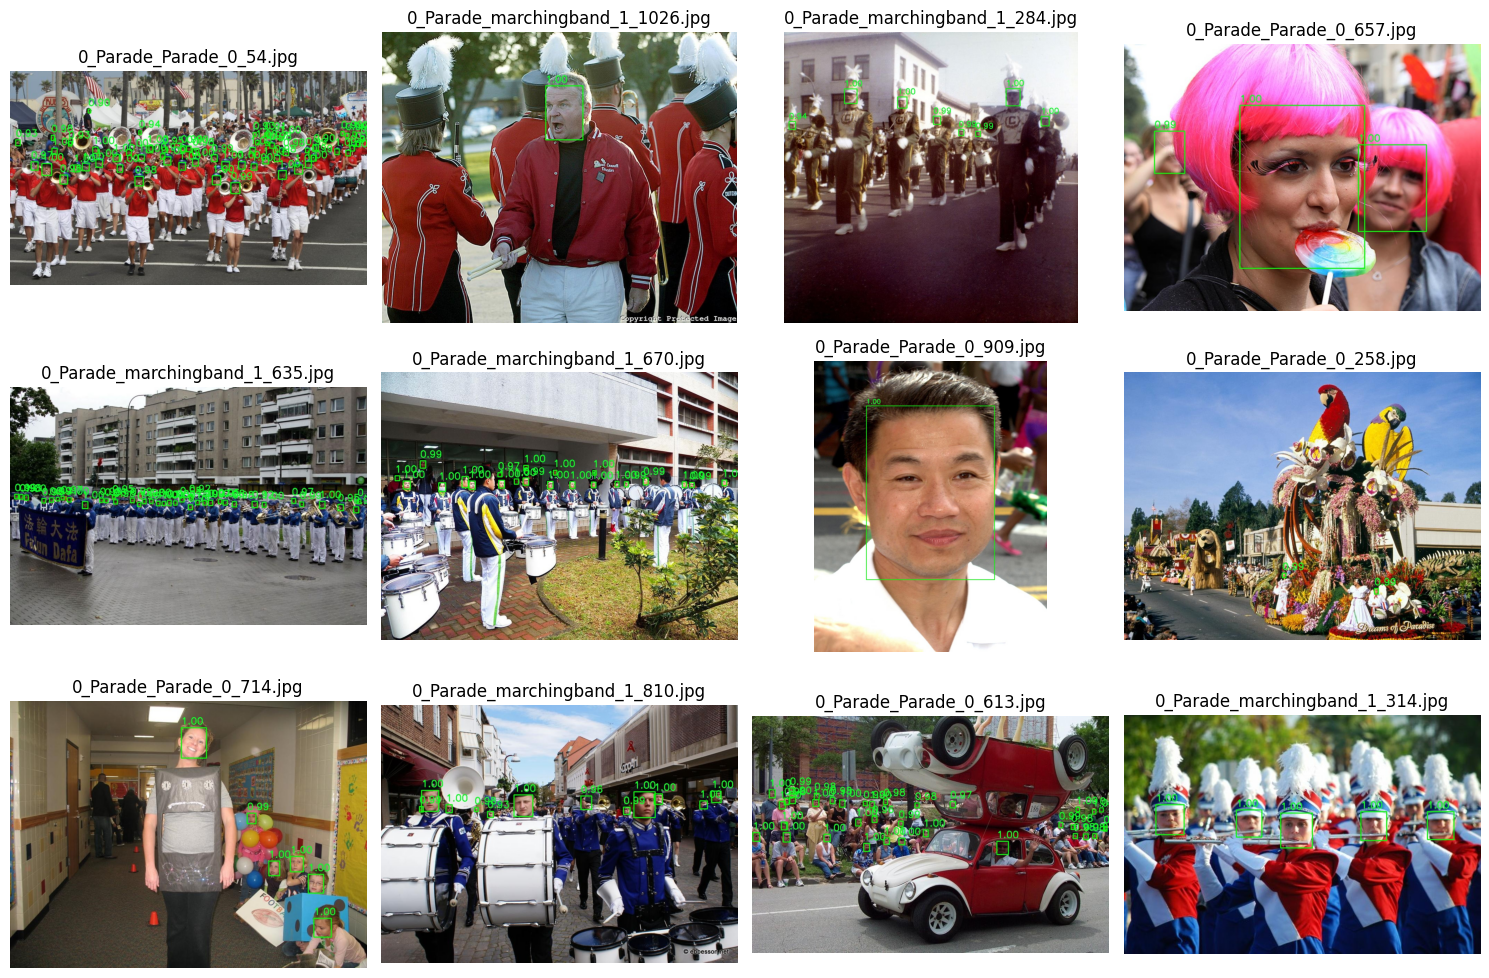

In [65]:
image_list=os.listdir("/kaggle/working/final_output")
    
selected_images = random.sample(image_list, 12)

# Set up the plot for displaying 12 images (3x4 grid)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Iterate through the selected images and display them
for i, img_file in enumerate(selected_images):
    # Read and convert the image
    img_path = os.path.join(output_folder, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get the subplot row and column
    row = i // 4
    col = i % 4
    
    # Display the image in the subplot
    axs[row, col].imshow(img_rgb)
    axs[row, col].axis('off')  # Hide the axis
    axs[row, col].set_title(img_file)  # Set the title to the image file name

# Adjust layout
plt.tight_layout()
plt.show()

## Testing

In [45]:
img_path="/kaggle/input/wider-face-a-face-detection-dataset/WIDER_test/WIDER_test/images/0--Parade/0_Parade_Parade_0_348.jpg"

In [46]:
testing=RetinaFace.detect_faces(img_path)

In [52]:
print(testing)

{'face_1': {'score': 0.9996892213821411, 'facial_area': [435, 415, 461, 444], 'landmarks': {'right_eye': [446.20993, 424.4978], 'left_eye': [457.82062, 425.55945], 'nose': [452.8114, 432.21783], 'mouth_right': [445.57913, 436.6821], 'mouth_left': [454.8949, 437.7046]}}, 'face_2': {'score': 0.9995037317276001, 'facial_area': [697, 394, 722, 425], 'landmarks': {'right_eye': [706.75885, 405.87372], 'left_eye': [718.34717, 405.3232], 'nose': [714.0558, 412.81952], 'mouth_right': [707.7944, 417.33804], 'mouth_left': [718.0874, 417.01932]}}, 'face_3': {'score': 0.9994107484817505, 'facial_area': [824, 417, 852, 447], 'landmarks': {'right_eye': [834.81757, 426.34363], 'left_eye': [846.7584, 426.37656], 'nose': [841.8023, 432.3721], 'mouth_right': [836.00653, 438.79285], 'mouth_left': [845.5285, 438.91867]}}, 'face_4': {'score': 0.9994089603424072, 'facial_area': [577, 329, 601, 355], 'landmarks': {'right_eye': [585.2377, 338.63177], 'left_eye': [595.7451, 338.98297], 'nose': [590.93207, 345.3

In [47]:
print(len(testing.keys()))

19


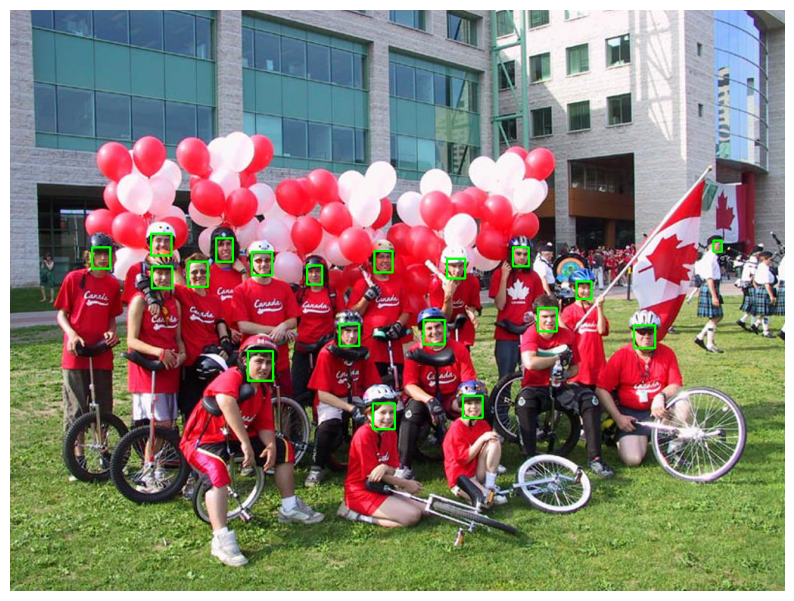

In [48]:
frame=cv2.imread(img_path)
if testing is not None:
    for key in testing.keys():
        identity=testing[key]
        landmarks=identity['landmarks']
        facial_area = identity["facial_area"]
        cv2.rectangle(frame, (facial_area[0], facial_area[1]), (facial_area[2], facial_area[3]), (0, 255, 0), 2)
cv2.imwrite("/kaggle/working/annotated_image.jpg",frame)

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(frame_rgb)
plt.axis('off')  # Hide axes
plt.show()

## **YOLOv8 Face**

In [9]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 607.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.0/869.0 kB 5.7 MB/s eta 0:00:0000:0100:01


In [10]:
from ultralytics import YOLO

In [21]:
yolo=YOLO(model="/kaggle/input/yolov8l_face/pytorch/default/1/yolov8l-face.pt",verbose=True)

In [22]:
res=yolo.val(data="/kaggle/input/yoloannotations/data.yaml")

Ultralytics YOLOv8.2.78 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /kaggle/input/wider-face-yolo/valid/labels... 406 images, 0 backgrounds, 0 corrupt: 100%|██████████| 406/406 [00:00<00:00, 518.30it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/wider-face-yolo/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:26<00:00,  1.03s/it]


                   all        406       7507       0.81      0.502      0.596      0.279
Speed: 0.7ms preprocess, 37.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val3
